**CREDIT CARD FRAUD DETECTION MODEL**

Problem statement:-
The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

IMPORTING IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9965.000000,9965.000000,9965.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,...,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5934.484897,-0.241681,0.280693,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,...,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4449.407112,1.522695,1.308882,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,...,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.012157,-0.208591,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,...,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4547.000000,-0.372624,0.286179,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,...,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10163.000000,1.151506,0.900823,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,...,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14864.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

**Handling missing values**


In [6]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9962,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9963,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,1
V4,1
V5,1
V6,1
V7,1
V8,1
V9,1


In [10]:
df.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


Now we can see that there is no missing values in the given dataset.

Checking the distribution of Class

In [12]:
classes = df['Class'].value_counts()
classes

,count
Class,
0.0,9927
1.0,38


In [13]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.62

In [14]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share


0.38

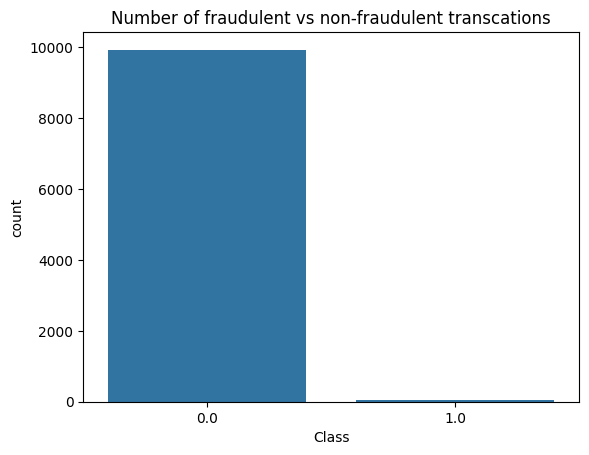

In [15]:
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

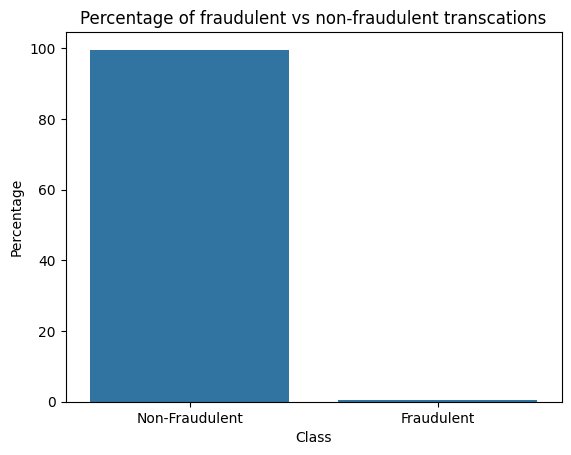

In [16]:
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()


**`Outliers treatment`**

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

Observe the distribution of classes with time

In [17]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

<ipython-input-18-c575e888c56d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
<ipython-input-18-c575e888c56d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False

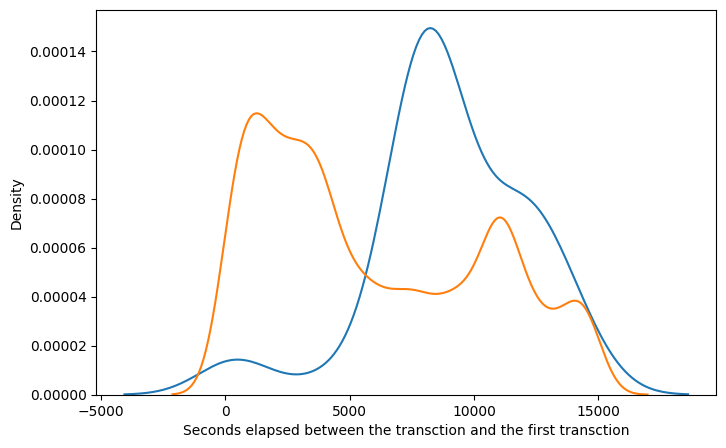

In [18]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

**Observe the distribution of classes with amount**

<ipython-input-19-6363bc7d815e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
<ipython-input-19-6363bc7d815e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=Fal

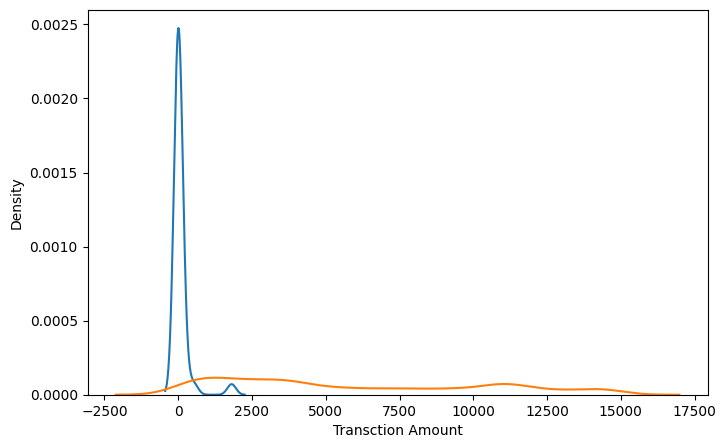

In [19]:
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()


**Train-Test Split**

In [20]:
# Import library
from sklearn.model_selection import train_test_split
# Putting feature variables into X
X = df.drop(['Class'], axis=1)
# Putting target variable to y
y = df['Class']
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

**Feature Scaling**
We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [21]:
from sklearn.preprocessing import StandardScaler
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
7773,10825,-0.969311,1.253038,0.763504,-0.440930,0.267168,-0.526955,1.004812,-0.084375,0.534284,...,-0.305830,-0.060217,0.061753,-0.101820,-0.028199,-0.197618,0.058140,-0.465951,-0.207689,-0.013872
5216,4999,-0.911366,0.297823,2.651417,0.419836,-0.073530,0.331379,-0.280878,0.470519,1.613713,...,-0.252376,-0.015382,0.162375,-0.024227,0.114149,-0.291667,-0.621807,0.121418,0.123840,-0.254183
7287,9744,1.197942,0.002521,0.836837,0.178275,-0.710208,-0.692612,-0.365457,-0.123716,1.672953,...,-0.135973,-0.230011,-0.401941,0.170277,0.398791,-0.030543,0.874491,-0.083610,0.004654,-0.260811
1361,1057,-1.441258,0.674872,2.685483,0.243826,-0.558726,0.764201,0.143656,0.054985,1.554454,...,0.334172,-0.357498,-0.051798,-0.462233,-0.029358,0.418554,0.362262,-0.432949,-0.531989,-0.162302
8515,11431,-0.131729,0.240145,1.393248,-0.562343,0.103432,-0.874503,0.589436,-0.380287,1.938447,...,-0.087143,-0.109418,0.251990,0.085535,0.397558,-1.107084,0.698552,-0.051746,-0.010261,-0.209178


In [22]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
61,41,1.138759,-1.192953,1.407131,-0.330070,-2.069503,-0.242175,-1.306635,0.104510,0.134628,...,-0.299307,-0.156198,-0.030569,-0.019723,0.433753,-0.029521,1.141241,-0.008612,0.041564,0.184053
2918,2466,1.116144,0.513875,0.866488,2.512308,-0.262168,-0.268716,-0.001428,0.064595,-0.637979,...,-0.244714,-0.208885,-0.690477,0.224231,0.331436,0.103843,-0.254106,0.004526,0.027106,-0.310733
6019,6760,1.106749,-0.443511,1.233067,0.419639,-1.258706,-0.407504,-0.742668,-0.022259,2.450776,...,-0.022122,-0.239373,-0.407701,0.027451,0.401553,0.049561,0.946797,-0.075390,0.019086,0.024719
7664,10626,-1.109963,0.104215,2.074489,-0.861887,0.566133,-1.377031,0.160790,-0.140725,1.052130,...,0.120671,-0.133431,-0.431460,0.030979,0.385033,-0.126229,0.704831,-0.072160,0.094320,-0.231039
7471,10162,1.182880,0.051146,0.841107,0.018382,-0.500300,-0.286042,-0.415972,-0.024078,1.273732,...,-0.078148,-0.180742,-0.224945,0.138876,0.236495,-0.007872,0.862932,-0.079217,-0.006461,-0.312711


**LOGISTIC REGRESSION MODEL**

In [23]:
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

**Tuning hyperparameter C**

C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [24]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [25]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [26]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.158127,0.090257,0.007687,0.002398,0.01,{'C': 0.01},1.000000,1.000000,0.989468,1.0,...,0.997768,0.004157,1,0.999485,0.999656,0.999994,0.999377,0.999623,0.999627,0.000209
1,0.108396,0.002665,0.006629,0.000135,0.10,{'C': 0.1},0.997751,0.969163,0.929067,1.0,...,0.979196,0.027653,2,0.999721,0.999283,0.999673,0.996002,0.999859,0.998908,0.001465
2,0.112655,0.010695,0.006486,0.000344,1.00,{'C': 1},0.992623,0.976715,0.899271,1.0,...,0.973722,0.038184,5,0.996082,0.999895,0.999958,0.998955,0.999978,0.998973,0.001496
3,0.115615,0.004124,0.006902,0.001269,10.00,{'C': 10},0.986596,0.983428,0.880817,1.0,...,0.970168,0.045187,6,0.999855,0.999913,0.999964,0.999414,0.998363,0.999502,0.000602
4,0.114111,0.007487,0.006616,0.000252,100.00,{'C': 100},0.989655,0.986260,0.909533,1.0,...,0.977089,0.034222,4,0.995731,0.999913,0.999909,0.999314,0.996738,0.998321,0.001747
5,0.114888,0.010240,0.008161,0.002244,1000.00,{'C': 1000},0.998561,0.983952,0.909533,1.0,...,0.978409,0.034966,3,0.999497,0.999901,0.999909,0.999226,0.996580,0.999023,0.001248


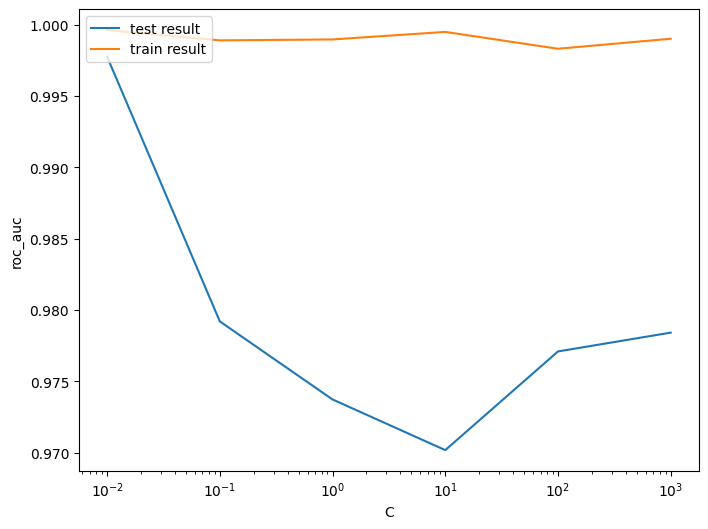

In [27]:

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [28]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9977677344598558 at C = 0.01


In [29]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[7939    0]
 [   7   26]]


In [31]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991219267436026
Sensitivity:- 0.7878787878787878
Specificity:- 1.0
F1-Score:- 0.8813559322033898


In [32]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7939
         1.0       1.00      0.79      0.88        33

    accuracy                           1.00      7972
   macro avg       1.00      0.89      0.94      7972
weighted avg       1.00      1.00      1.00      7972



In [33]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[1988    0]
 [   0    5]]


In [34]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1988
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00      1993
   macro avg       1.00      1.00      1.00      1993
weighted avg       1.00      1.00      1.00      1993

